# Assignment 2
## Task 5

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


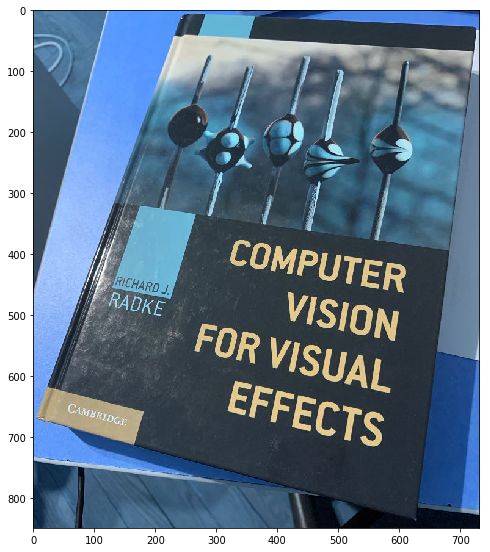

In [1]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
figsize = (8,18)

def _plot(img):
    plt.figure(figsize=figsize)
    plt.imshow(img)

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
_plot(img)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])
dst_shape = (300, 400)

### Our Implementation

In [2]:
def get_coef(a, b, n):
    res = []
    b = [b[0], b[1], 1]
    dim = 3
    for i in range(dim):
        curr = [0] * dim * 4
        curr[i] = a[0]
        curr[dim + i] = a[1]
        curr[2*dim + i] = 1 if i != 2 else 0
        
        curr[3*dim + n - 1] = -b[i]
        res.append(curr)
        
    return res
    

def getPerspectiveTransform(pts1, pts2):
    A = []
    plen = len(pts1)
    for i in range(plen):
        A += get_coef(pts1[i], pts2[i], i)
        
    B = [0, 0, -1] * plen
    C = np.linalg.solve(A, B)
    res = np.ones(9)
    res[:8] = C.flatten()[:8]
    return res.reshape(3,-1).T

M = getPerspectiveTransform(pts1, pts2)
M

array([[ 7.53496708e-01,  2.67479949e-01, -1.83197586e+02],
       [-3.99227991e-02,  8.41850329e-01,  4.57029261e+00],
       [ 3.03922821e-04,  6.21097907e-04,  1.00000000e+00]])

In [3]:
# since OpenCV has very confusing clashes between interfaces and internal matrix representation,
# i.e. in interface we identify point as (horizontal, vertical), while when accesses directly it
# should be (vertival, horizontal). Thus to avoid code magic and possible bugs, we made the 
# convertion from matrix representation to interface form(and vice versa) explicitly
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

Wall time: 4.28 s


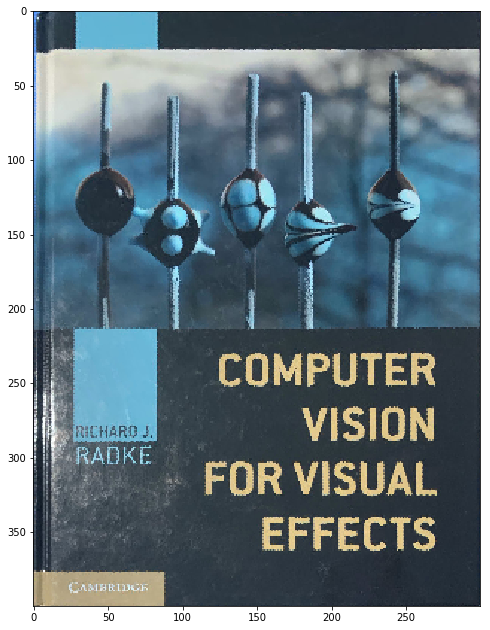

In [4]:
%%time
def warpPerspective(img, M, shape):
    mtr = to_mtx(img)
    R,C = shape
    dst = np.zeros((R,C,3))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst)

dst_shape = (300, 400)
dst = warpPerspective(img, M, dst_shape)
_plot(dst)

### OpenCV implementation

[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


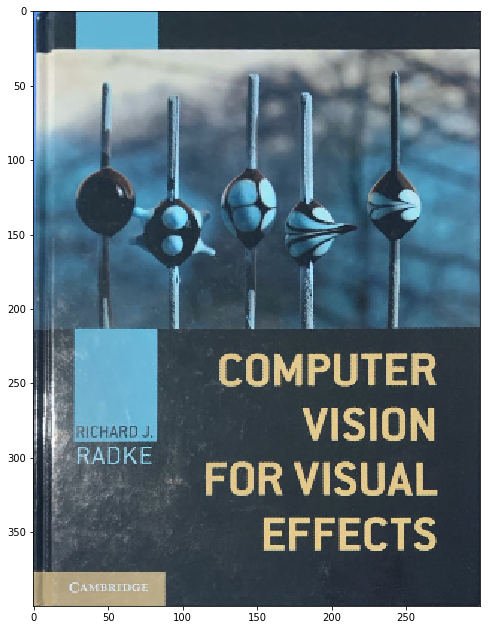

In [5]:
M_cv = cv2.getPerspectiveTransform(pts1,pts2)
print(M_cv)

dst = cv2.warpPerspective(img, M_cv, (300, 400))
_plot(dst)